In [55]:
import numpy as np
import pandas as pd
from itertools import product
#from nltk import ngrams
#import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Calculate n grams

In [2]:
alphabet = 'абвгдеёжзийклмнопрстуфхцчьыъшщэюя'
n = 3

def build_n_grams(n):
    combinations = dict()
    for i in range(1,n+1):
        combinations[i] = [''.join(val) for val in [p for p in product(list(alphabet),repeat = i)]]
    return combinations

n_grams = build_n_grams(3)

# Read textes and build dataframe

In [3]:
def build_dataframe(text: str, gramms):
    text_data = {}
    for j in gramms:
        for i in gramms[j]:
            text_data[i] = text.count(i)
    return text_data

In [4]:
def read_authors(dirname, n_grams):
    data = []
    for _dir in os.listdir(dirname):
        _current_dir = os.path.join(dirname,_dir)
        if(os.path.isdir(_current_dir)):
            for _file in os.listdir(_current_dir):
                filepath = os.path.join(_current_dir, _file)
                text = None
                string_data = {'author': _dir, 'name': _file}
                with open(filepath, 'r') as f:
                    try:
                        text = ''.join(filter(str.isalpha, f.read()))
                        string_data['lenght'] = len(text)
                        n_parts = build_dataframe(text, n_grams)
                        string_data.update(n_parts)
                    except UnicodeDecodeError as e:
                        print('Unable to read the text (some encoding errors)')
                        print('\033[91m {} \033[0m'.format(str(e)))
                data.append(string_data)
    return data

# Modify data and calculate PDF

In [7]:
data = read_authors('./data', n_grams)
df = pd.DataFrame(data)

In [36]:
df.head()

,author,lenght,name,а,аа,ааа,ааб,аав,ааг,аад,...,ёёч,ёёш,ёёщ,ёёъ,ёёы,ёёь,ёёэ,ёёю,ёёя,ёёё
0,Гоголь,6557,Вечера на хуторе близ диканьки,504,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Гоголь,21887,Невский проспект,1623,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Гоголь,10915,Записки сумасшедшего,957,5,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Гоголь,20292,Мертвые души,1478,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Гоголь,16794,Тарас Бульба,1418,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
author_full = df.groupby('author').sum()
author_ethalon = author_full.div(author_full['lenght'], axis=0)

In [35]:
author_ethalon

,lenght,а,аа,ааа,ааб,аав,ааг,аад,аае,ааж,...,ёёч,ёёш,ёёщ,ёёъ,ёёы,ёёь,ёёэ,ёёю,ёёя,ёёё
author,,,,,,,,,,,,,,,,,,,,,
Гоголь,1.0,0.078226,0.000105,0.0,0.0,0.000026,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Достоевский,1.0,0.076758,0.000165,0.0,0.0,0.000030,0.0,0.0,0.000015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Толстой,1.0,0.081926,0.000091,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def dist_between():
    pass
def deviation_own():
    pass
def deviation_others():
    pass

In [ ]:
def predict_text():
    pass

In [93]:
df.columns[1:]

Index(['lenght', 'name', 'а', 'аа', 'ааа', 'ааб', 'аав', 'ааг', 'аад', 'аае',
       ...
       'ёёч', 'ёёш', 'ёёщ', 'ёёъ', 'ёёы', 'ёёь', 'ёёэ', 'ёёю', 'ёёя', 'ёёё'],
      dtype='object', length=37061)

LinAlgError: singular matrix

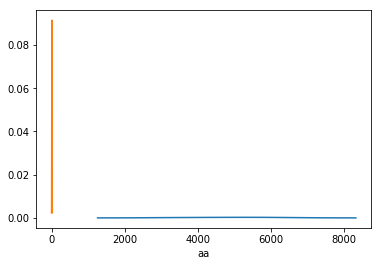

In [96]:
grouped = df.groupby('author')
for i in df.columns[3:]:
    sns.distplot(grouped[i].sum(), hist = False)